# 3. Data Cleaning
Fix the inconsistencies within the data and handle the missing values.

## Import Libraries

In [1]:
# Basic import(s)
import pandas as pd
import numpy as np

# Visualization libraries
import missingno as msno
%matplotlib inline

# Hide all warnings in ipython
import warnings
warnings.filterwarnings('ignore')

## Import Datasets

In [2]:
# Loading of the known.csv dataset via pandas.
known_dataset = pd.read_csv('data/known.csv', sep=';', # Seperate semi colin in csv file with pandas separator. 
                            decimal=',', # Specify how decimals interprets.
                            encoding='utf-8') 


In [3]:
# Loading of the unknown.csv dataset via pandas.
unknown_dataset = pd.read_csv('data/unknown.csv', sep=';', # Seperate semi colin in csv file with pandas separator. 
                               decimal=',', # Specify how decimals interprets.
                            encoding='utf-8') 

In [4]:
# Show head for known_dataset.
# We want to make sure that the known.csv dataset has been read in correctly.
known_dataset.head()

,"index,",longitude,latitude,f1,f2,f3,f4,f5,f6,t1
0,0,14.25,52.17,11,2403.0,890,344,3.0000,497.0,120800
1,1,14.11,52.20,15,5644.0,2659,783,6.7559,757.0,312000
2,2,14.26,52.10,52,2084.0,1438,516,2.3087,550.0,258600
3,3,11.47,53.09,32,3011.0,1287,525,5.0605,529.0,311000
4,4,11.46,53.03,33,2824.0,1797,493,3.6359,523.0,135100


In [5]:
# Show head for unknown_dataset.
# We want to make sure that the unknown.csv dataset has been read in correctly.
unknown_dataset.head()

,index,longitude,latitude,f1,f2,f3,f4,f5,f6,t1
0,0,13.28,52.63,34,3850,1619,602,5.0465,608.0,0
1,1,13.31,52.45,21,5041,2719,1420,3.5335,1491.0,0
2,2,13.39,52.40,52,1509,674,244,4.9306,225.0,0
3,3,13.46,52.59,42,1291,1535,332,1.9083,345.0,0
4,4,13.22,52.51,27,4742,1682,696,6.1940,775.0,0


## Data Preparation And Quality Check
After we have successfully loaded the data, we need a good overview of quality of the data.

In [6]:
# Drop index columns because it's not necessary.
known_dataset = known_dataset.drop(labels='index,', axis = 1)
unknown_dataset = unknown_dataset.drop(labels='index', axis = 1)

In [7]:
# Import readed .csv dataset into DataFrame.
known_dataset=pd.DataFrame(known_dataset)
unknown_dataset=pd.DataFrame(unknown_dataset)

In [8]:
# Create column named "id" based on row index start with 1.
known_dataset['id']=known_dataset.index+1
unknown_dataset['id']=unknown_dataset.index+1

In [9]:
# Check whether the adjustments produce the desired result for known.csv dataset.
known_dataset.head()

,longitude,latitude,f1,f2,f3,f4,f5,f6,t1,id
0,14.25,52.17,11,2403.0,890,344,3.0000,497.0,120800,1
1,14.11,52.20,15,5644.0,2659,783,6.7559,757.0,312000,2
2,14.26,52.10,52,2084.0,1438,516,2.3087,550.0,258600,3
3,11.47,53.09,32,3011.0,1287,525,5.0605,529.0,311000,4
4,11.46,53.03,33,2824.0,1797,493,3.6359,523.0,135100,5


In [10]:
# Check whether the adjustments produce the desired result for unknown.csv dataset.
unknown_dataset.head()

,longitude,latitude,f1,f2,f3,f4,f5,f6,t1,id
0,13.28,52.63,34,3850,1619,602,5.0465,608.0,0,1
1,13.31,52.45,21,5041,2719,1420,3.5335,1491.0,0,2
2,13.39,52.40,52,1509,674,244,4.9306,225.0,0,3
3,13.46,52.59,42,1291,1535,332,1.9083,345.0,0,4
4,13.22,52.51,27,4742,1682,696,6.1940,775.0,0,5


In [11]:
# Let's see how many target values are in our known.csv dataset.
known_dataset['t1'].value_counts()

500001    700
162500     86
137500     84
112500     76
187500     75
         ... 
393700      1
57800       1
360900      1
41400       1
303100      1
Name: t1, Length: 3599, dtype: int64

In [12]:
# Let's see how many target values are in our unknown.csv dataset.
unknown_dataset['t1'].value_counts()

0    767
Name: t1, dtype: int64

#### 1. How many data samples are in our datasets?

In [13]:
# How many datas and columns are in our known.csv dataset?
print("The known.csv dataset has {} rows and {} columns.".format(known_dataset.shape[0], known_dataset.shape[1]))

The known.csv dataset has 15000 rows and 10 columns.


Each row cointains the details of the known.csv dataset:
15000 data samples are included in our known.csv dataset.

In [14]:
# How many datas and columns are in our known.csv dataset?
print("The unknown.csv dataset has {} rows and {} columns.".format(unknown_dataset.shape[0], unknown_dataset.shape[1]))

The unknown.csv dataset has 767 rows and 10 columns.


Each row cointains the details of the unknown.csv dataset:
767 data samples are included in our unknown.csv dataset.

#### 2. What format is the data in (int=number, float= decimal number, object=text)? Which formats are surprising?

In [15]:
# Check data formats from known.csv dataset.
known_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   longitude  15000 non-null  float64
 1   latitude   15000 non-null  float64
 2   f1         15000 non-null  int64  
 3   f2         14999 non-null  float64
 4   f3         15000 non-null  int64  
 5   f4         15000 non-null  int64  
 6   f5         15000 non-null  float64
 7   f6         14854 non-null  float64
 8   t1         15000 non-null  int64  
 9   id         15000 non-null  int64  
dtypes: float64(5), int64(5)
memory usage: 1.1 MB


Our known.csv dataset cointains 5 columns with integers (int) and 5 columns with float.

In [16]:
# Check data formats from unknown.csv dataset.
unknown_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   longitude  767 non-null    float64
 1   latitude   767 non-null    float64
 2   f1         767 non-null    int64  
 3   f2         767 non-null    int64  
 4   f3         767 non-null    int64  
 5   f4         767 non-null    int64  
 6   f5         767 non-null    float64
 7   f6         758 non-null    float64
 8   t1         767 non-null    int64  
 9   id         767 non-null    int64  
dtypes: float64(4), int64(6)
memory usage: 60.0 KB


Our unknown.csv dataset cointains 6 columns with integers (int) and 4 columns with float.

#### 3. Are there any missing values?

In general missing values can be handled by deleting the rows or columns having null values. If columns have more than half of the rows as null then the entire column can be dropped. The rows which are having one or more column values as null can also be dropped.

We can handle missing values in the dataset in 7 ways:
1. **Deleting rows with missing values:**

Pros:
- A model trained with the removal of missing values creates a robust model.

Cons:
- Loss of a lot of information.
- Works poorly if the percentage of missing values is excessive in comparison to the complete dataset.

2. **Impute missing values for continous variable:**

Pros:
- Prevent data loss which results in deletion of rows or columns.
- Works well with  a small dataset and is easy to implement.

Cons:
- Works only with numerical continuous variables.
- Can cause data leakage.
- Do not factor the covariance between features.

3. **Impute missing values for categorical variable:**

Pros:
- Prevent data loss which results in deletion of rows or columns.
- Works well with a small dataset and is easy to implement.

Cons:
- Works only with categorical variables.
- Addition of few features to the model while encoding, which maay result in poor performance.

4. **Other Imputation Methods:**

Depending on the nature of the data or data type, some other imputation methods may be more appropriate to impute missing values.

For example, for the data variable having longitudinal behavior, it might make sense to use the last valid observation to fill the missing value. This is known as the Last observation carried forward (LOCF) method.

For the time-series dataset variable, it makes sense to use the interpolation of the variable before and after a timestamp for a missing value.

5. **Using Algorithms that support missing values:**

Pros:
- No need to handle missing values in each column as ML algorithms will handle them efficiently.

Cons:
- No implementation of these ML algorithms in scikit-learn library.

6. **Prediction of missing values:**

Pros:
- Give a better result than earlier methods.
- Takes into account the covariance between the missing value column and other columns.

Cons:
- Considered only as a proxy for the true values.

7. **Imputation using Deep Learning Library - Datawig:**

Pros:
- Quite accurate compared to other methods.
- It supports CPUs and GPUs.

Cons:
- Can be quite slow with large datasets.

<AxesSubplot:>

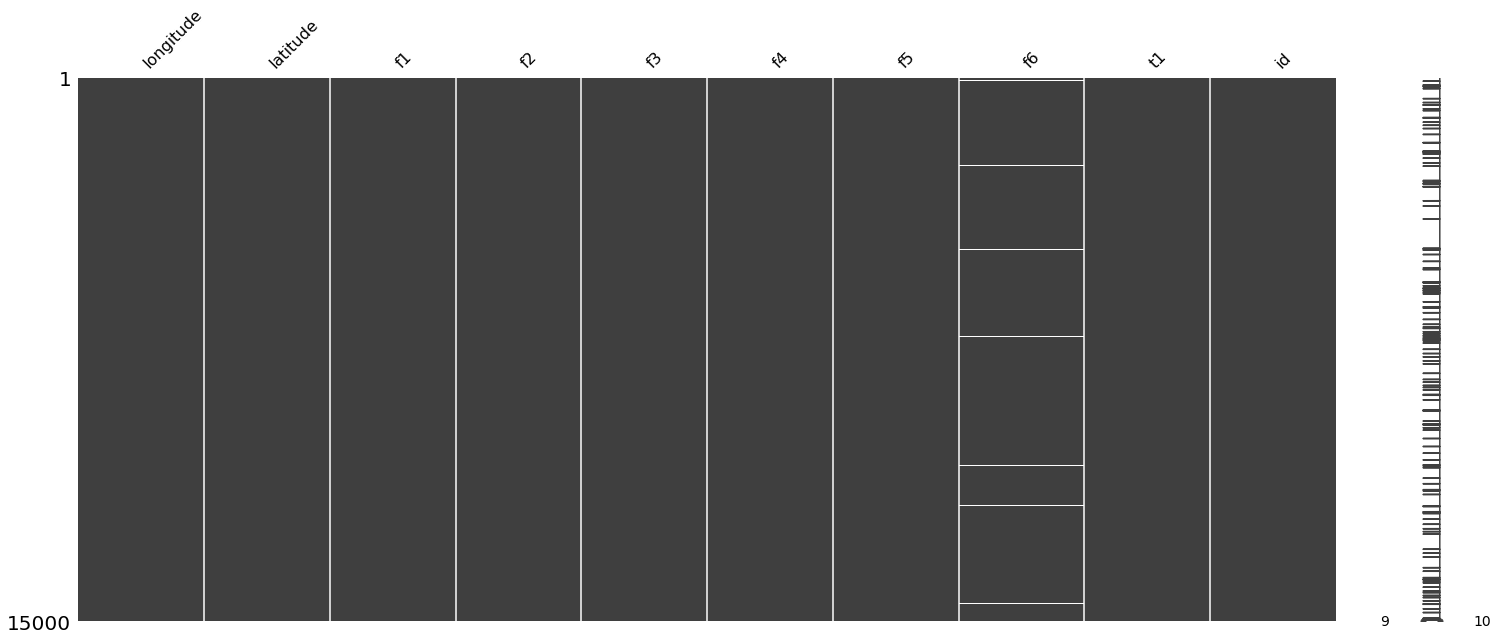

In [17]:
# The msno.matrix nullity matrix is a data-dense display which lets us quickly visually pick out patterns in data completion.
# Check known.csv dataset.
msno.matrix(known_dataset)

In [18]:
# Missing values
known_dataset.isnull().sum().sort_values(ascending=False)

f6           146
f2             1
longitude      0
latitude       0
f1             0
f3             0
f4             0
f5             0
t1             0
id             0
dtype: int64

In [19]:
# Summation of the missing values and calculation of the missing values as a percentage in known dataset.
missing_values = pd.DataFrame(known_dataset.isnull().sum(),columns=['count'])
missing_values['percentage'] = (missing_values['count']/known_dataset.shape[0]*100).round(2)
missing_values.query('count != 0')

,count,percentage
f2,1,0.01
f6,146,0.97


<AxesSubplot:>

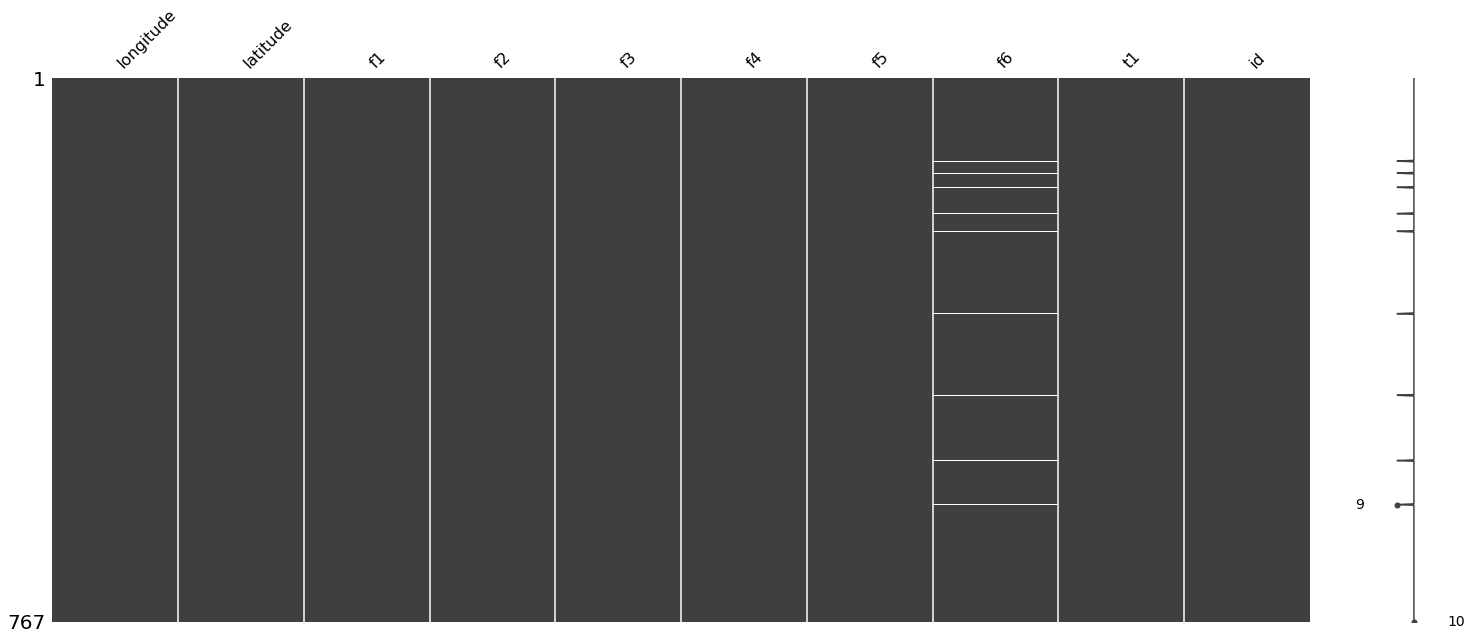

In [20]:
# The msno.matrix nullity matrix is a data-dense display which lets us quickly visually pick out patterns in data completion.
# Check unknown.csv dataset.
msno.matrix(unknown_dataset)

In [21]:
# Missing values
unknown_dataset.isnull().sum().sort_values(ascending=False)

f6           9
longitude    0
latitude     0
f1           0
f2           0
f3           0
f4           0
f5           0
t1           0
id           0
dtype: int64

In [22]:
# Summation of the missing values and calculation of the missing values as a percentage in unknown dataset.
missing_values = pd.DataFrame(unknown_dataset.isnull().sum(),columns=['count'])
missing_values['percentage'] = (missing_values['count']/unknown_dataset.shape[0]*100).round(2)
missing_values.query('count != 0')

,count,percentage
f6,9,1.17


`So we decide to impute missing values with Mean/Median, because columns in the dataset which are having numeric continous values can be replaced with the mean, median, or mode of remaining values in the column. This method can prevent the loss of data. Replacing two approximations (mean, median) is a statistical approach to handle the missing values.`

In [23]:
known_dataset['f6'] = known_dataset['f6'].replace(np.NaN, known_dataset['f6'].mean())

In [24]:
known_dataset['f2'] = known_dataset['f2'].replace(np.NaN, known_dataset['f2'].mean())

In [25]:
# Check again for missing values in known.csv dataset.
known_dataset.isnull().sum().sort_values(ascending=False)

longitude    0
latitude     0
f1           0
f2           0
f3           0
f4           0
f5           0
f6           0
t1           0
id           0
dtype: int64

In [26]:
unknown_dataset['f6'] = unknown_dataset['f6'].replace(np.NaN, unknown_dataset['f6'].mean())

In [27]:
# Check again for missing values in unknown.csv dataset.
unknown_dataset.isnull().sum().sort_values(ascending=False)

longitude    0
latitude     0
f1           0
f2           0
f3           0
f4           0
f5           0
f6           0
t1           0
id           0
dtype: int64

## Export Cleaned Datasets

In [28]:
# Save cleaned known dataset to a new .csv file
path = 'data/cleaned_known.csv'
known_dataset.to_csv(path, 
index=False) # Avoid creating an index in a saved .csv file.

In [29]:
# Save cleaned unknown dataset to a new .csv file
path = 'data/cleaned_unknown.csv'
unknown_dataset.to_csv(path, 
index=False) # Avoid creating an index in a saved .csv file.